In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the data 
df = pd.read_csv("spam.csv",  encoding='ISO-8859-1')

In [3]:
# Exploring the first 10 data form the dataset
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Steps involved in the Project
#### 1. Data Cleaning
### 2. Text Perprocessing
### 3. Model building
### 4. Evaluation
### 5. Improvement 
### 6. Deployment

In [5]:
# Phase 1 : Problem Understanding
# Building the system that can classify an SMS as spam or ham(not spam)


## Data Cleaning

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# As more then 90% data are null value in last 3 column so we can drop the last 3 colums
df.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
# This gives us 5 random data form the dataset
df.sample(5)

,v1,v2
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes
3168,ham,"Haven't seen my facebook, huh? Lol!"
1144,ham,Really... I tot ur paper ended long ago... But...
5548,ham,"No, I was trying it all weekend ;V"
980,ham,If he started searching he will get job in few...


In [9]:
# changing the name of column
df.columns = ["lable","message"]

In [10]:
# Convert the labels into binary (0,1)
# We use labelEncoder which conert the categorical data into numerical values . Each unique
# value is assigned a specific integer label. The integer values donot imply any rank in the
# original data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["lable"]= encoder.fit_transform(df["lable"])


In [11]:
df

,lable,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
# We have to check two things:: Missing values and duplicate values
df.isnull().sum()

lable      0
message    0
dtype: int64

In [13]:
df.duplicated().sum()
# We have got 403 duplicate value we must drop this value befor training the model

403

In [14]:
df = df.drop_duplicates(keep="first")

In [15]:
df.duplicated().sum()

0

## EDA

In [16]:
# Calculating how much percentage of data is spam and how much percentage of data is not spam
data =df["lable"].value_counts()

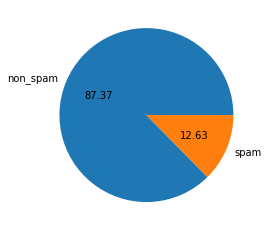

In [17]:
import matplotlib.pyplot as plt
plt.pie(data, labels = ["non_spam", "spam"],autopct ="%0.2f")
plt.show()

In [18]:
# Calculaing the no of alphabates in each message
df.loc[:,"no_of_characters"]= df["message"].apply(len)
# .loc ensures that you are working on the original DataFrame and modifying it in place 
# without causing any issues

<ipython-input-18-5492843876c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"no_of_characters"]= df["message"].apply(len)


In [19]:
df

,lable,message,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s  0:00:01m 1.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.5/803.5 kB 1.2 MB/s  0:00:001.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]━━━━━━━━━━━━━ 2/3 [nltk]


In [21]:
import nltk

In [22]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/saksham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/saksham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Number of words
df.loc[:,"No_words"]=df["message"].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-23-fe45eb6e4a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"No_words"]=df["message"].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df

,lable,message,no_of_characters,No_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
# getting the no of sentences
df.loc[:,"No_sentence"] = df["message"].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-25-7ec9200237e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"No_sentence"] = df["message"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df

,lable,message,no_of_characters,No_words,No_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
# Tokenization are common technique in NLP that involves breaking down text into smaller unit for
# analysis.


In [28]:
df.describe()

,lable,no_of_characters,No_words,No_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
# Analysis of sentence for the ham message
df[df["lable"] == 0].describe()

,lable,no_of_characters,No_words,No_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [30]:
# Analysis of Sentence for the spam message
df[df["lable"] == 1].describe()

,lable,no_of_characters,No_words,No_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='no_of_characters', ylabel='Count'>

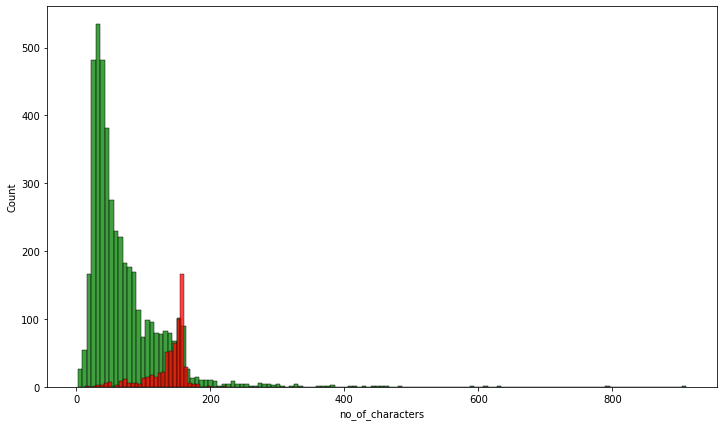

In [31]:
# Visualizing the no of character used in each ham and spam message
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(df[df["lable"]== 0]["no_of_characters"], color = "green")
sns.histplot(df[df["lable"]== 1]["no_of_characters"], color = "red")

<Axes: xlabel='No_words', ylabel='Count'>

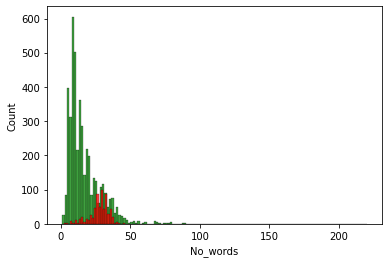

In [32]:
# Comparing no of words in the ham and spam message
sns.histplot(df[df["lable"]== 0]["No_words"], color = "green")
sns.histplot(df[df["lable"]== 1]["No_words"], color = "red")

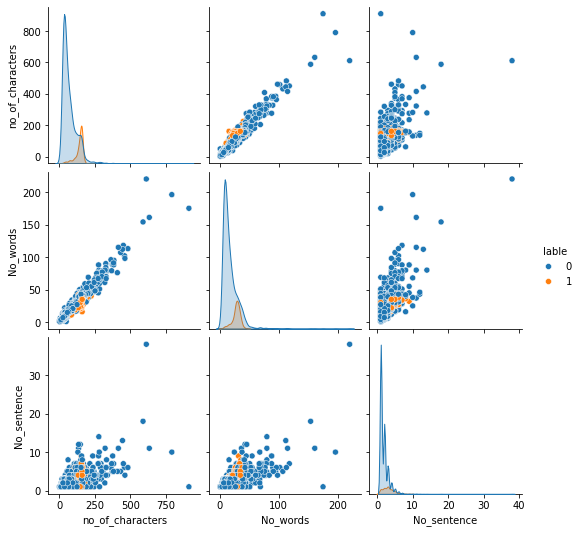

In [33]:
# Finding the relationship between the given features
sns.pairplot(df, hue="lable")

In [34]:
# PairPlot() :: This function creates a grid of scatterplots showing pairwise realtionship
# between all columns in a DataFrame. It plots every numerical column against every other 
# numerical column in the dataset to visualize the relationships between them. 

<Axes: >

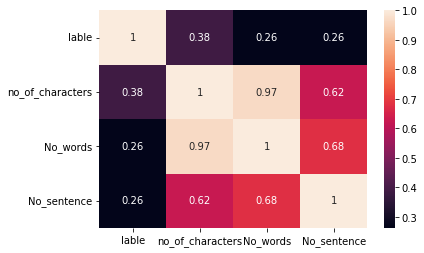

In [35]:
# Dawing the headmap of the correlation
df_numerical = df.select_dtypes(include=["int"]) # This will take only the numerical values
sns.heatmap(df_numerical.corr(), annot=True)


In [36]:
# This problem have the multicolineariy and we cannot take all the data points lable that is 
# target have the highest corelation with no of character so will we use no of character to 
# build the model

## Data PreProcessing (Text Preprocessing)
#### These are the data preprocessing for the texual data

In [37]:
# Lower case
# Tokenization :: Breaking the sentence into individual words
# Removing special characters
# Removing stop words and punctuation : They are the word that does not have any meaning to 
# the sentence and only used for the formation of the sentence
# Streammig :: Here we convert similar types of words into a single word just like converting 
# dancing , dance , danced into dance as they all give same meaning to the sentence

In [38]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower() # converting the words into lower case
    text = nltk.word_tokenize(text) # Tokenization
    y = []
    for i in text:
        if i.isalnum(): # This will remove the special charecters
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    # Steming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
       
    
    return " ".join(y)

In [39]:
transform_text(df["message"][45])

'call messag miss call'

In [40]:
# Now transforming the message according to above transformations
df["transformed_text"] = df["message"].apply(transform_text)

<ipython-input-40-f0254c5eaf28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["message"].apply(transform_text)


In [41]:
df.head()

,lable,message,no_of_characters,No_words,No_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Making the word Cloud

In [42]:
# In the context of email spam classification , word cloud is a visual representation of the
# most frequent words in a collecion of text data. The size of each word in the cloud corresponds
# how frequently that word appears in the dataset

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size =3 , background_color= "white")

In [44]:
spam_wc = wc.generate(df[df["lable"]==1]["transformed_text"].str.cat(sep=" "))

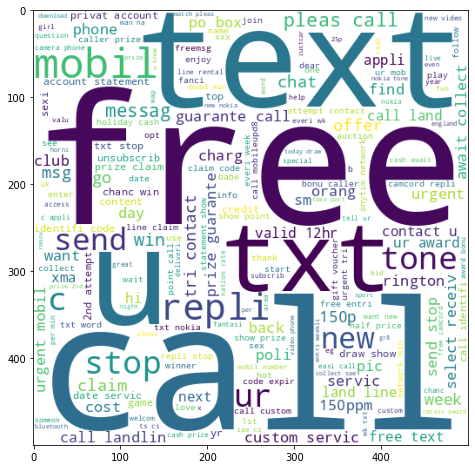

In [45]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [46]:
# Word cloud for the ham message
ham_wc = wc.generate(df[df["lable"]==0]["transformed_text"].str.cat(sep=" "))

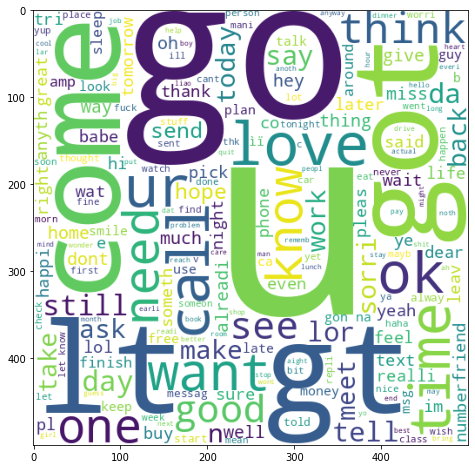

In [47]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [48]:
# checking the top 30 words used in hams and spam
# Convering entire spam text message into a list of item
spam_corpus  =[]
for msg in df[df["lable"]==1]["transformed_text"].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [49]:
len(spam_corpus)

9939

In [50]:
# This will create the dictionary of all the individual words in spam_corpus and calculte its
# frequency
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [51]:
ham_corpus = []
for mes in df[df["lable"]==0]["transformed_text"].tolist():
    for word in mes.split():
        ham_corpus.append(word)

In [52]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

## Model Building

In [55]:
# Vectorization:: Converting the text data into vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [56]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
# Input feature
X.shape

(5169, 6708)

In [59]:
# Here are 5169 messages and 6708 unique vocabolary in our entire documents

In [60]:
# Output feature
y = df["lable"]

In [61]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size =0.2, random_state =4 )

In [64]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [65]:
# Object of each different nibebase algorithms
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()


In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[783 123]
 [ 17 111]]
0.47435897435897434


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred1))